In [29]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Random Sample Imputation

Aim: Random sample imputation consists of taking random observation from the dataset and we use this observation to replace the nan values

When should it be used? 
It assumes that the data are missing completely at random(MCAR)

In [30]:
df=sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [31]:
df1=df[['age','survived','fare']]

In [32]:
df1.isnull().mean()

age         0.198653
survived    0.000000
fare        0.000000
dtype: float64

In [33]:
df1.isnull().sum()

age         177
survived      0
fare          0
dtype: int64

In [34]:
df['age'].isnull().sum()

177

In [35]:
df1['age'].dropna().sample(df['age'].isnull().sum(),random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: age, Length: 177, dtype: float64

In [36]:
def impute_nan(df2,variable,median):
    df2[variable+'_median']=df2[variable].fillna(median)
    df2[variable+'_random']=df2[variable]
    random_sample=df1[variable].dropna().sample(df[variable].isnull().sum(),random_state=0)
    random_sampleindex=df[df['age'].isnull()].index
    df2.loc[df2[variable].isnull(),variable+'_random']=random_sample
    
    
impute_nan(df1,'age',df['age'].median())
df1

<ipython-input-36-f0151212973a>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[variable+'_median']=df2[variable].fillna(median)
<ipython-input-36-f0151212973a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2[variable+'_random']=df2[variable]
C:\Users\SANGMESH\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentati

,age,survived,fare,age_median,age_random
0,22.0,0,7.2500,22.0,22.0
1,38.0,1,71.2833,38.0,38.0
2,26.0,1,7.9250,26.0,26.0
3,35.0,1,53.1000,35.0,35.0
4,35.0,0,8.0500,35.0,35.0
...,...,...,...,...,...
886,27.0,0,13.0000,27.0,27.0
887,19.0,1,30.0000,19.0,19.0
888,NaN,0,23.4500,28.0,NaN
889,26.0,1,30.0000,26.0,26.0


In [37]:
df[df['survived'].notnull()].index

Int64Index([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,
            ...
            881, 882, 883, 884, 885, 886, 887, 888, 889, 890],
           dtype='int64', length=891)

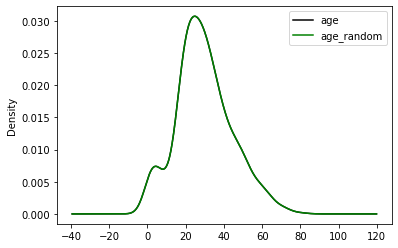

In [38]:
fig = plt.figure()
ax = fig.add_subplot(111)
df1['age'].plot(kind='kde', ax=ax,color='k')
#df1['age_median'].plot(kind='kde', ax=ax, color='red')
df1['age_random'].plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### Advantages
#1.Easy To implement


#2.There is less distortion in variance


# Disadvantage
1.Every situation randomness wont work

In [39]:
###capture nan values with new feature

In [40]:
df1['age2']=np.where(df1['age'].isnull(),1,0)

<ipython-input-40-120a18f3c92d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['age2']=np.where(df1['age'].isnull(),1,0)


In [41]:
df['age'].fillna(df['age'].median())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    28.0
889    26.0
890    32.0
Name: age, Length: 891, dtype: float64

In [53]:
df['age'].replace(np.nan,df.age.median()).isnull().sum()

0

In [56]:
df

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


#### Advantages
1.Easy to implement


2.Captures the importance of missing values


#### Disadvantages
3.Creating Additional Features(Curse of Dimensionality)

#### End of distrbution imputation

C:\Users\SANGMESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

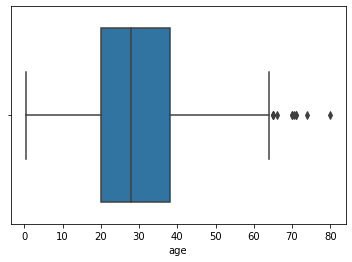

In [60]:
df1=df[['age','survived','fare']]
sns.boxplot(df['age'])

<AxesSubplot:>

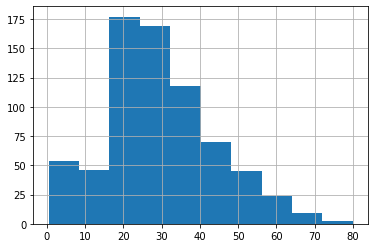

In [65]:
df['age'].hist()

In [80]:
extreme=df['age'].median()+3*df['age'].std()


In [84]:
median=df['age'].median()

In [81]:
df1=df[['age','survived','fare']]

In [94]:
def imputaion(df,variable, median,extreme):

    df[variable+'_end_of_distribution']=df[variable].fillna(extreme)
    df[variable+'_median']=df[variable].fillna(median)
    
    
imputaion(df1,'age',median,extreme)  
df1

<ipython-input-94-94659d7585e0>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+'_end_of_distribution']=df[variable].fillna(extreme)
<ipython-input-94-94659d7585e0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[variable+'_median']=df[variable].fillna(median)


,age,survived,fare,age_end_of_distribution,age_median
0,22.0,0,7.2500,22.000000,22.0
1,38.0,1,71.2833,38.000000,38.0
2,26.0,1,7.9250,26.000000,26.0
3,35.0,1,53.1000,35.000000,35.0
4,35.0,0,8.0500,35.000000,35.0
...,...,...,...,...,...
886,27.0,0,13.0000,27.000000,27.0
887,19.0,1,30.0000,19.000000,19.0
888,NaN,0,23.4500,71.579492,28.0
889,26.0,1,30.0000,26.000000,26.0


C:\Users\SANGMESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_end_of_distribution'>

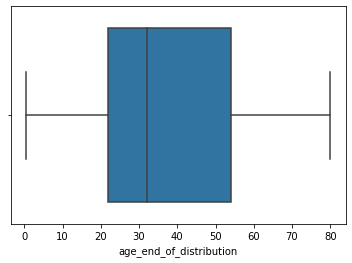

In [97]:
sns.boxplot(df1['age_end_of_distribution'])

C:\Users\SANGMESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age_median'>

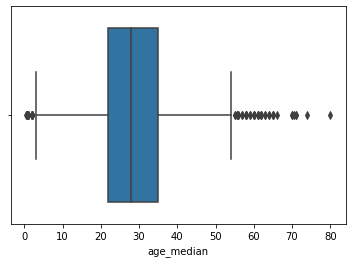

In [99]:
sns.boxplot(df1['age_median'])

C:\Users\SANGMESH\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age'>

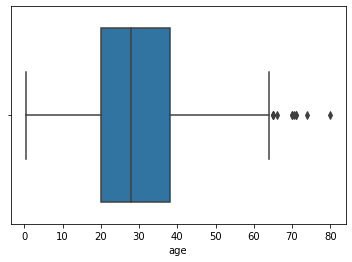

In [100]:
sns.boxplot(df1['age'])

<AxesSubplot:>

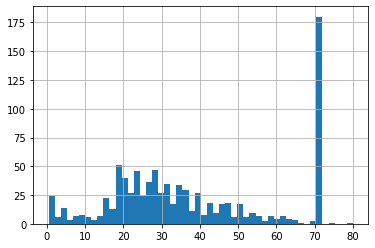

In [104]:
df1['age_end_of_distribution'].hist(bins=50)

<AxesSubplot:>

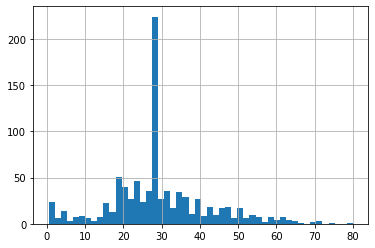

In [105]:
df1['age_median'].hist(bins=50)

<AxesSubplot:>

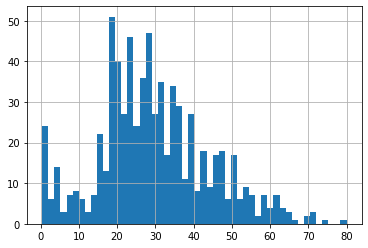

In [106]:
df1['age'].hist(bins=50)